In [17]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt



# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from Funcs import *
from Model import *
model = graduate_model()
model.setup()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1
We consider a graduate $i$ making a choice between entering $J$ different career tracks.  
We start by calculating the expected utility and the average realised utility for each career choice.  

We do this by first drawing 10.000 epsilons for each of the 3 careers and storing them, such that we have $u^1_{i,j}=[\varepsilon_1, \varepsilon_2, \varepsilon_3]$ (with hopefully obvious notation).  
We then use these epsilons to calculate what is printed below as "Realised utilities", which is simply the epsilon multiplied by the v-array.  

We then calculate the mean of these 10.000 draws of epsilon, by taking the mean across each column that that the mean for career 1, 2 and 3 are calculated seperately. This is printed below as "Mean of all 10.000 realised utilities".  

Finally we calculate the expected utility by taking the mean across all the epsilons (remembering that we stored them) and thus simply calculating it directly. This gives the same value as above and is printed as "Expected utility"

In [18]:
realised_utility, expected_utility, realised_utility_mean = sim_utility(model.par)
print("Realised utilities")
print(realised_utility)
print(50*'-')
print("Mean of all 10.000 realised utilities")
print(realised_utility_mean)
print(50*'-')
print("Expected utility")
print(expected_utility)

Realised utilities
[[ 1.99342831e+00  1.72347140e+00  4.29537708e+00]
 [ 4.04605971e+00  1.53169325e+00  2.53172609e+00]
 [ 4.15842563e+00  3.53486946e+00  2.06105123e+00]
 ...
 [ 4.64977830e+00  3.75341367e+00  5.35983092e-01]
 [-1.52241651e+00  8.45424299e-01  5.88920797e+00]
 [-2.73463113e-03 -1.78471365e+00  2.54223158e+00]]
--------------------------------------------------
Mean of all 10.000 realised utilities
[0.98858639 2.00533542 3.00394879]
--------------------------------------------------
Expected utility
[0.98858639 2.00533542 3.00394879]


We see that the mean of the 10.000 draws is equal to the expected utility, which is what we would expect as well.

# Question 2
The indivuals now consider their friends when making career choices.  
We are told that they have a number of friends equal to their index, such that person 1 has 1 friend, person 2 has 2 etc.  
Their prior expectations are given by:
$$\tilde{u}^k_{i,j}(F_i)=\frac{1}{F_i}\sum_{f=1}^{F_i}\left(v_j+\varepsilon_{f,j}^k\right)$$
Here, we are a bit unsure about the notation, but we will assume the following (where we use 1 draw as an example):
Person 1 draws 3 values (one for each career) such that $$\varepsilon_{1,j}=[\varepsilon_{11},\varepsilon_{12},\varepsilon_{13}]$$
Person 2 draws 6 values (two for each career) such that $$\varepsilon_{2,j}=\left[\begin{array}{ccc}
   \varepsilon_{11}  & \varepsilon_{12} & \varepsilon_{13} \\
    \varepsilon_{21}  & \varepsilon_{22} & \varepsilon_{23}
\end{array}\right]$$
Etc. for all other persons, such that person 3 draws 9 values. They then sum column-wise such that all person end up with a $1\times3$ matrix of epsilons, and then divide by the number of friends. That is how we interpret the sum from the prior expectations equation. Our results does not make any sense, if we first add v to the sum of epsilons and then divide by number of friend.    
We can then find the career track with the highest expected utility for each draw.


Again, the notation is hopefully obvious...

In [19]:
# Start by calling the function:
actual_epsilon_storage, expected_utility, career_choice, actual_utility = friend_utility(model.par)
print("Expected utility for person 1:")
print(expected_utility[1,:5,:])
print(50*'-')
print("Actual utility for person 1:")
print(actual_utility[1,:5,:])
print(50*'-')
print("Career choice for person 1:")
print(career_choice[1,:5])

Expected utility for person 1:
[[ 3.06064676  2.88045749  4.59944645]
 [ 0.25654922  1.01111919  3.4953552 ]
 [-0.0204639   2.02062711  1.2511293 ]
 [-1.99855403 -1.47404443  2.9612095 ]
 [-0.02841981  2.12669098  1.50278364]]
--------------------------------------------------
Actual utility for person 1:
[[ 2.24061759 -0.78213069  4.75785991]
 [ 3.08767455  3.29129315  2.25747075]
 [-0.39165587  2.51059753  0.67829259]
 [-0.70995505  4.81583217  4.8947333 ]
 [ 2.55784051  2.89496658  3.1017043 ]]
--------------------------------------------------
Career choice for person 1:
[2 2 1 2 1]


We see, that the person now picks the career with the highest expected utility.  
However, also note that it is not always the actual highest realized utility as can be seen from the last shown simulation, where the actual utility is highest for career 3, but the expected utility is higher for career 2, which is what the person chooses (remembering Python indexing such that career choice = 1 means career 2).

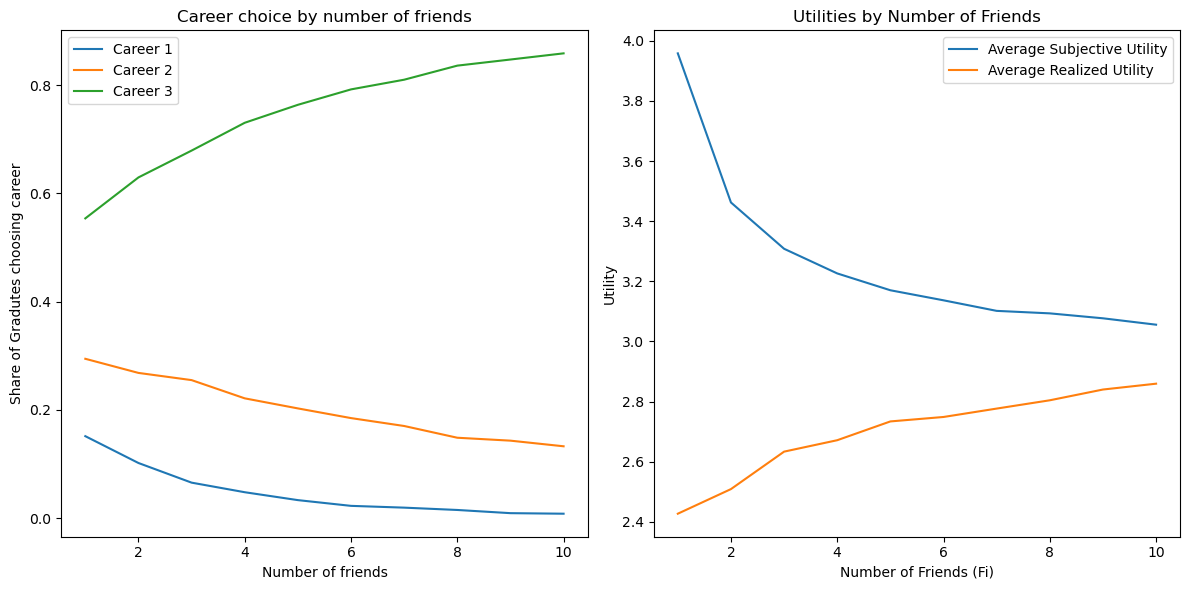

In [20]:
career_shares, expected_average_utility, actual_average_utility = analyze(model.par, career_choice, expected_utility, actual_utility)

# Plot results
plotting(career_shares, expected_average_utility, actual_average_utility)


We see, that when the graduates have more friends, their expectations come closer to the true values of epsilon (which is 0).  
They then choose the career with the highest payoff which is career 3.  

We also note, that as the number of friends increase the subjective (expected) and realised utility approach each other (and approach 3 as more people switch to career 3).

# Question 3
We now consider a case, where the graduates learn their actual utility and they can then choose to switch to another career with a cost of switching given by c.  
Thus, they compare the actual utility of their chosen career with the expected utility of the other careers minus c.

*We start by making some tests to see if our code is correct for calculating the new utilities*

In [21]:
choice_utility, new_career_choice, new_career_shares, new_expected_average_utility, new_actual_average_utility = switch(model.par, career_choice, expected_utility, actual_utility)

print('Actual utility for person 1')
print(actual_utility[1,5:10,:])
print(50*'-')
print('Expected utility for person 1')
print(expected_utility[1,5:10,:])
print(50*'-')
print('Original career choice for person 1')
print(career_choice[1,5:10])
print(50*'-')
print('Utility for the different choices for person 1')
print(choice_utility[1,5:10,:])
print(50*'-')
print('New career choice for person 1')
print(new_career_choice[1,5:10])



Actual utility for person 1
[[ 5.38344205  3.66638649  3.31642912]
 [-0.69630403  4.86150916  4.1547543 ]
 [-0.21282733  2.65730567  2.09096014]
 [ 3.4933629   2.80308786  0.06624102]
 [-0.43440886  1.78236671  4.8459462 ]]
--------------------------------------------------
Expected utility for person 1
[[-1.05562969  2.32628901  2.26500283]
 [-0.2324092   4.79177471  2.61317487]
 [-0.5106817   2.70212306  3.27809496]
 [ 0.44338976  4.44867638  4.22490946]
 [-0.28898231  2.77151578  3.54104983]]
--------------------------------------------------
Original career choice for person 1
[1 1 2 1 2]
--------------------------------------------------
Utility for the different choices for person 1
[[-2.05562969  3.66638649  1.26500283]
 [-1.2324092   4.86150916  1.61317487]
 [-1.5106817   1.70212306  2.09096014]
 [-0.55661024  2.80308786  3.22490946]
 [-1.28898231  1.77151578  4.8459462 ]]
--------------------------------------------------
New career choice for person 1
[1 1 2 2 2]


The first two prints are the actual utilities and expected utilities. The third print is the original career choice.  
The 'Utility for the different choices' takes the actual utility for the current career choice as given and it then adds the expected utility minus the cost of transfer for the careers not chosen. We see that this works, and we are thus confident our code is correct.  

Finally, we see that people do switch correctly based on the new utility, as one draw of person 1 switches from career 2 (Python index 1) to career 3 (Python index 2).

We now plot the results.

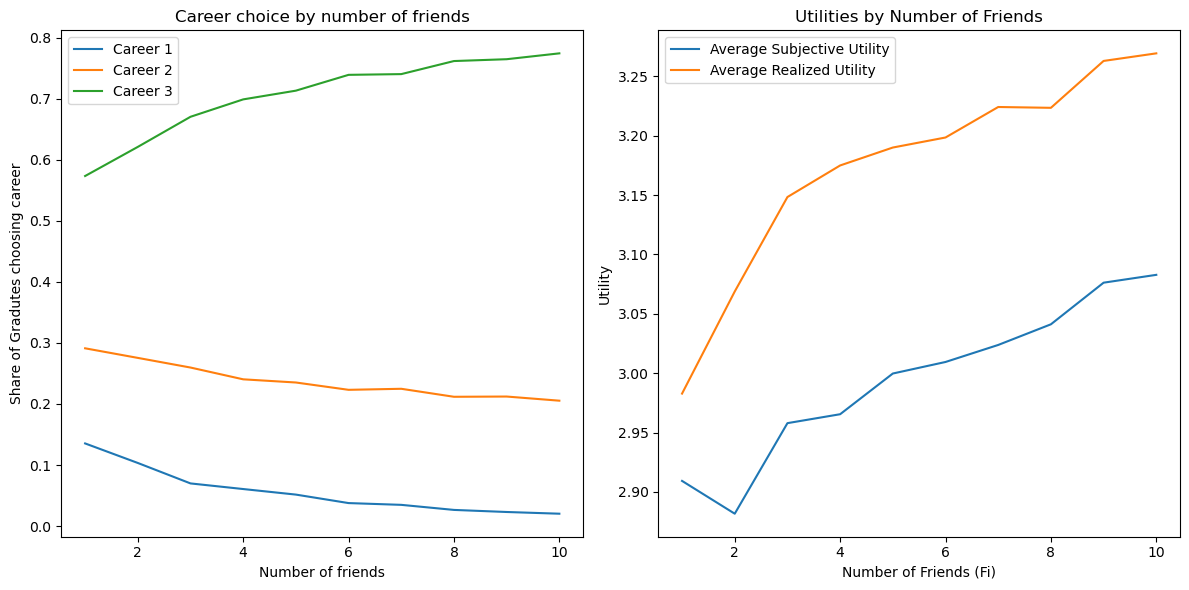

In [22]:
# Plot results
plotting(new_career_shares, new_expected_average_utility, new_actual_average_utility)


We see now that the share of graduates curve are more flat compared to before.  
We also see that the more friends one got, the higher both expected and realised utility is. We do however find the utility curves weird and suspect something must be wrong with our code, but we are unsure of what it is.

Below is plotted the number of swithces for each person:

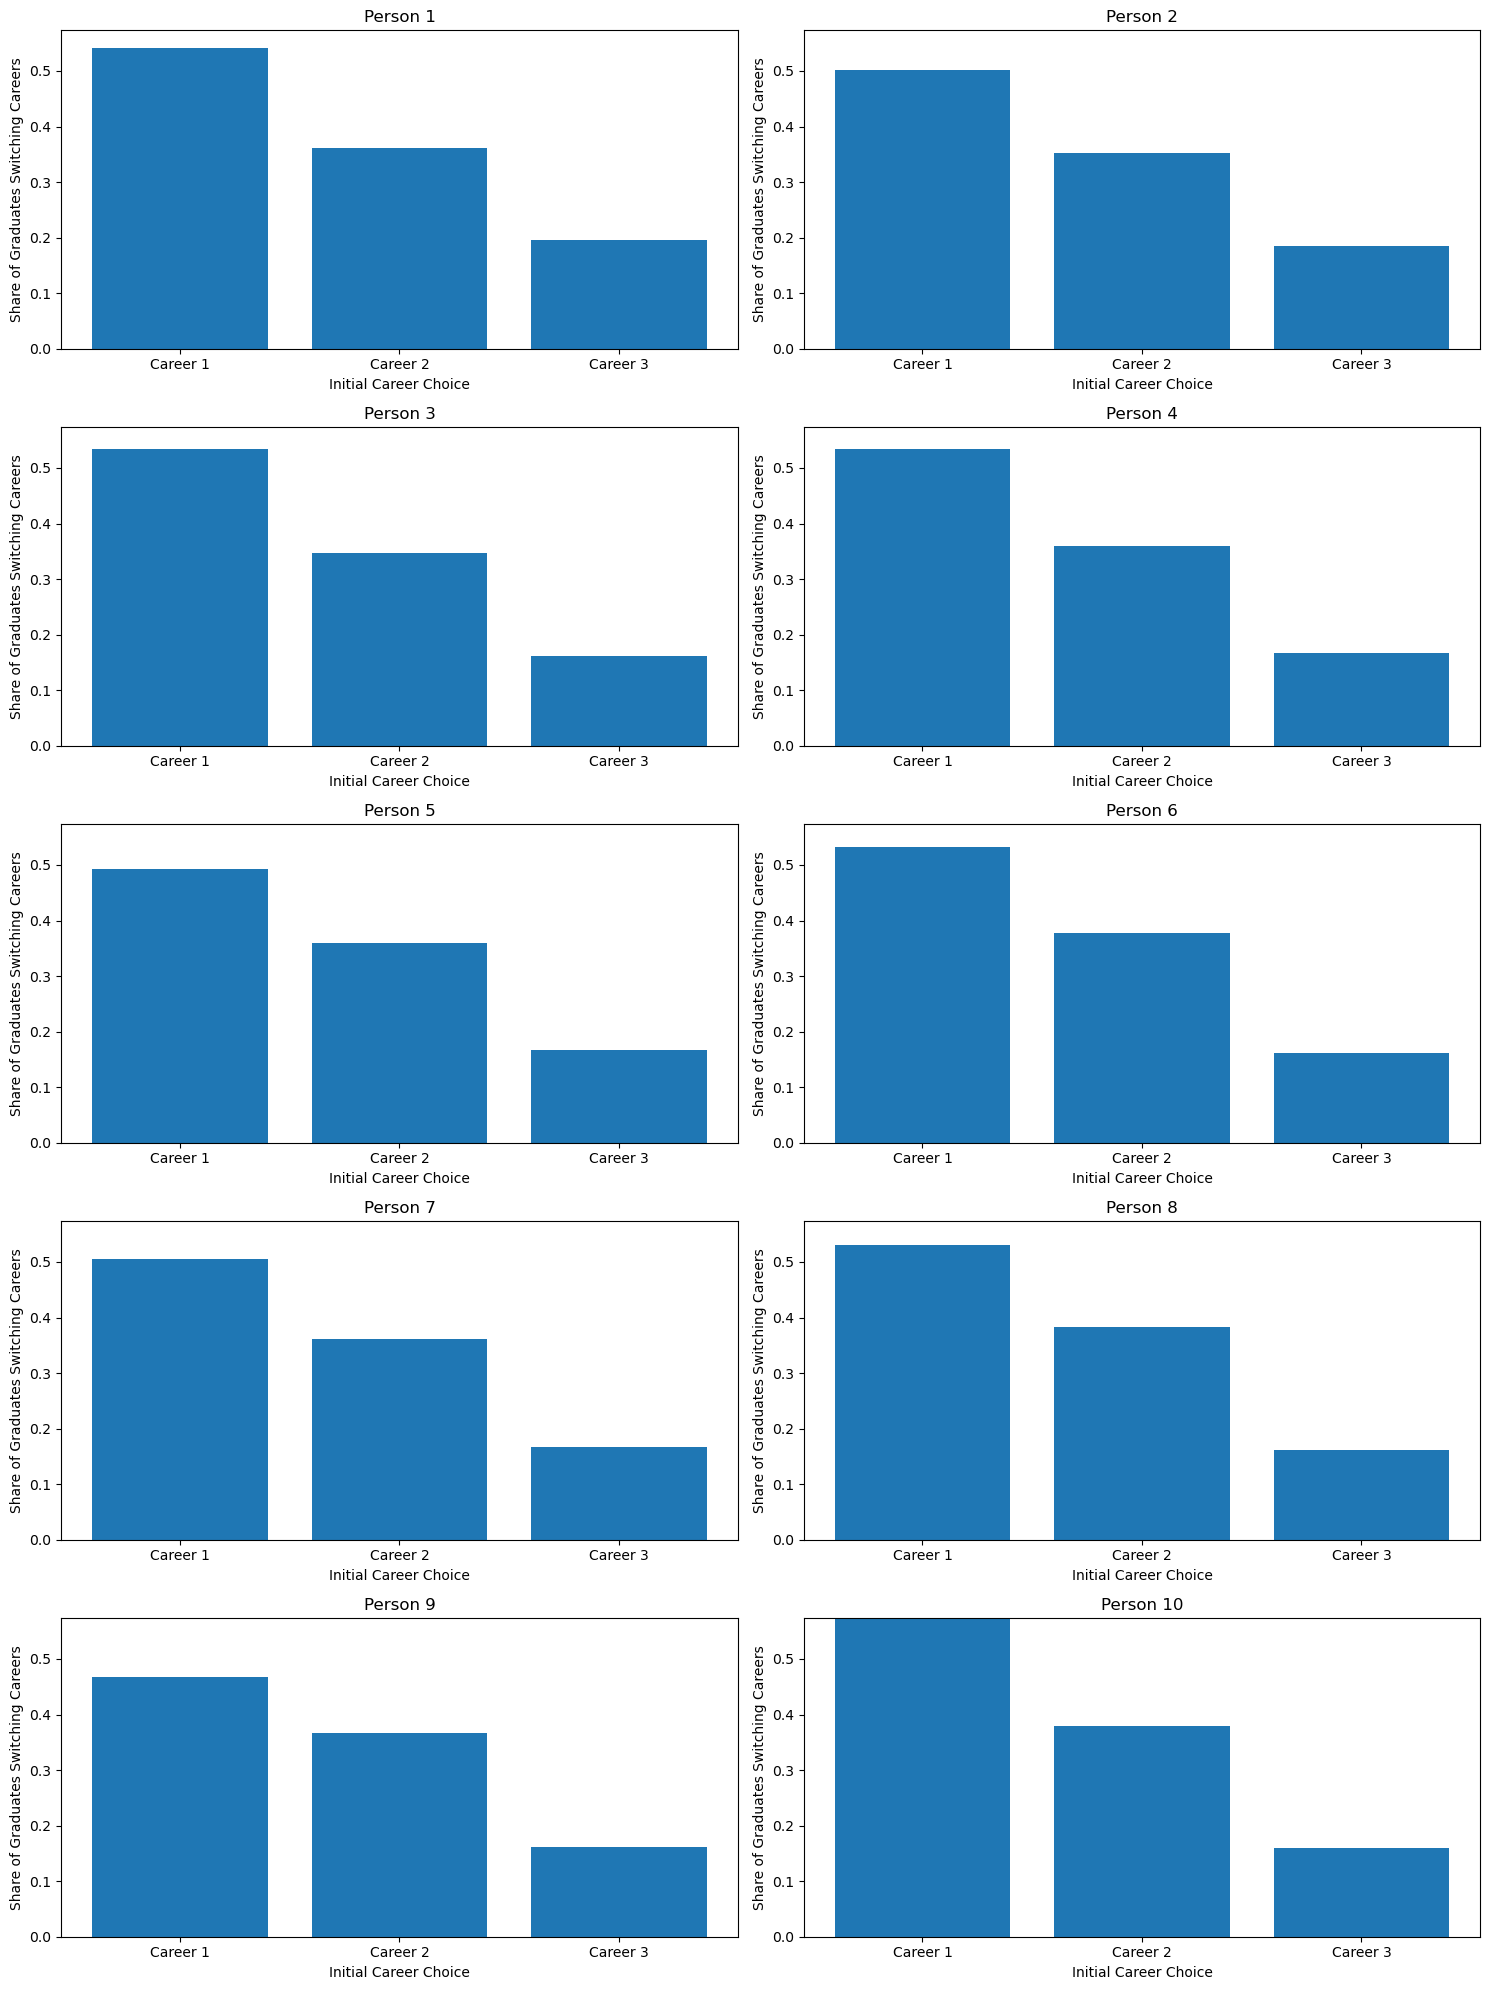

In [23]:
plot_switch_shares(par, career_choice, new_career_choice)

It is clear that the more friends they have, the more they switch away from especially career 1.